<a href="https://colab.research.google.com/github/rushvi2/ds2002/blob/main/Variables_Viz_continued.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# Test file for github

x = ' Hello World'


import pandas as pd
#
var_list = ['happy', 'hapunhap','relig','attend', 'relig16','age','income'] # List of variables you want to save
output_filename = 'selected_gss_data.csv' # Name of the file you want to save the data to
#
modes = ['w','a'] # Has write mode and append mode
phase = 0 # Starts in write mode; after one iteration of loop, switches to append mode
#
for k in range(3): # for each chunk of the data
    url = 'https://github.com/DS3001/project_gss/raw/main/gss_chunk_' + str(1+k) + '.parquet' # Create url to the chunk to be processed
    print(url) # Check the url is correct
    df = pd.read_parquet(url) # Download this chunk of data
    print(df.head()) # Visually inspect the first few rows
    df.loc[:,var_list].to_csv(output_filename, # specifies target file to save the chunk to
                              mode=modes[phase], # control write versus append
                              header=var_list, # variable names
                              index=False) # no row index saved
    phase = 1 # Switch from write mode to append mode

https://github.com/DS3001/project_gss/raw/main/gss_chunk_1.parquet
   year  id            wrkstat  hrs1  hrs2 evwork    occ  prestige  \
0  1972   1  working full time   NaN   NaN    NaN  205.0      50.0   
1  1972   2            retired   NaN   NaN    yes  441.0      45.0   
2  1972   3  working part time   NaN   NaN    NaN  270.0      44.0   
3  1972   4  working full time   NaN   NaN    NaN    1.0      57.0   
4  1972   5      keeping house   NaN   NaN    yes  385.0      40.0   

         wrkslf wrkgovt  ...  agehef12 agehef13 agehef14  hompoph wtssps_nea  \
0  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
1  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
2  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
3  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   
4  someone else     NaN  ...       NaN      NaN      NaN      NaN        NaN   

   wtssnrps_nea  wtssps_next wt

In [3]:
# Cleaning attend
df = pd.read_csv("/content/selected_gss_data.csv")
print(df.shape)
print(df.head())
print(df['attend'].describe())
print(df['attend'].unique())
print(df['attend'].value_counts())

# Looks pretty good already

(72392, 7)
           happy hapunhap       relig                      attend relig16  \
0  not too happy      NaN      jewish  about once or twice a year     NaN   
1  not too happy      NaN    catholic                  every week     NaN   
2   pretty happy      NaN  protestant          about once a month     NaN   
3  not too happy      NaN       other                       never     NaN   
4   pretty happy      NaN  protestant                       never     NaN   

    age income  
0  23.0    NaN  
1  70.0    NaN  
2  48.0    NaN  
3  27.0    NaN  
4  61.0    NaN  
count     71692
unique       10
top       never
freq      13855
Name: attend, dtype: object
['about once or twice a year' 'every week' 'about once a month' 'never'
 'several times a year' 'several times a week' '2-3 times a month'
 'less than once a year' 'nearly every week' nan 'attend']
never                         13855
every week                    13659
about once or twice a year     9415
several times a year      

In [4]:
# Cleaning relig16
print(df['relig16'].describe())
print(df['relig16'].unique())
print(df['relig16'].value_counts())

# Looks pretty good
# Rename for clarity
df = df.rename(columns = {'relig16':'relig_fam'})


count          68790
unique            14
top       protestant
freq           40587
Name: relig16, dtype: object
[nan 'protestant' 'none' 'catholic' 'other' 'jewish' 'relig16' 'christian'
 'inter-nondenominational' 'hinduism' 'buddhism' 'orthodox-christian'
 'muslim/islam' 'other eastern religions' 'native american']
protestant                 40587
catholic                   20423
none                        4324
jewish                      1408
other                        734
christian                    529
muslim/islam                 192
buddhism                     177
hinduism                     174
orthodox-christian           160
inter-nondenominational       38
native american               26
other eastern religions       16
relig16                        2
Name: relig16, dtype: int64


In [5]:
# Cleaning age
print(df['age'].describe())
print(df['age'].unique())
print(df['age'].value_counts())
print(df['age'].dtype)

# Looks pretty good
# Cast as int to make it cleaner
#df['age'] = df['age'].astype('int64')

print(df['age'].dtype)


count     71623
unique       73
top        30.0
freq       1571
Name: age, dtype: object
['23.0' '70.0' '48.0' '27.0' '61.0' '26.0' '28.0' '21.0' '30.0' '56.0'
 '54.0' '49.0' '41.0' '24.0' '62.0' '46.0' '57.0' '58.0' '71.0' '53.0'
 '42.0' '20.0' '25.0' '78.0' '35.0' '51.0' '76.0' '39.0' '64.0' '50.0'
 '40.0' '43.0' '37.0' '22.0' '31.0' '52.0' '47.0' '45.0' '68.0' '63.0'
 '19.0' '55.0' '44.0' '34.0' '36.0' '74.0' '69.0' '29.0' '67.0' '75.0'
 '38.0' '73.0' '84.0' '82.0' '72.0' '59.0' '33.0' '81.0' '65.0' '32.0' nan
 '60.0' '80.0' '66.0' '77.0' '18.0' '79.0' '83.0' '85.0' '88.0' '87.0'
 '89.0' '86.0' 'age']
30.0    1571
32.0    1566
34.0    1552
28.0    1548
33.0    1526
        ... 
85.0     221
86.0     211
87.0     158
88.0     130
age        2
Name: age, Length: 73, dtype: int64
object
object


In [6]:
#Cleaning happy
print(df.shape)
print(df['happy'].describe())
print(df['happy'].unique())
print(df['happy'].value_counts())
print( 'Total missing: ', sum( df['happy'].isnull() ) )

df = df.dropna(subset=['happy'])
print(df['happy'].describe())

(72392, 7)
count            67590
unique               4
top       pretty happy
freq             37813
Name: happy, dtype: object
['not too happy' 'pretty happy' 'very happy' nan 'happy']
pretty happy     37813
very happy       20385
not too happy     9390
happy                2
Name: happy, dtype: int64
Total missing:  4802
count            67590
unique               4
top       pretty happy
freq             37813
Name: happy, dtype: object


In [7]:
print(df['hapunhap'].describe())
print(df['hapunhap'].unique())
print(df['hapunhap'].value_counts())
print( 'Total missing: ', sum( df['hapunhap'].isnull() ) )
#19,434 missing values ... might not want to use.


count     7396
unique       8
top        2.0
freq      3565
Name: hapunhap, dtype: object
[nan 'hapunhap' '1.0' '2.0' '3.0' '4.0' '5.0' '6.0' '7.0']
2.0         3565
1.0         2710
3.0          864
4.0          160
5.0           72
6.0           17
7.0            6
hapunhap       2
Name: hapunhap, dtype: int64
Total missing:  60194


In [8]:
print(df['income'].describe())
print(df['income'].unique())
print(df['income'].value_counts())
print( 'Total missing: ', sum( df['income'].isnull() ) )
df = df.dropna(subset=['income'])
print( 'Total missing: ', sum( df['income'].isnull() ) )


count               59294
unique                 13
top       $25,000 or more
freq                31963
Name: income, dtype: object
[nan '$10,000 to $14,999' '$7,000 to $7,999' '$4,000 to $4,999'
 '$1,000 to $2,999' '$15,000 to $19,999' '$5,000 to $5,999'
 '$20,000 to $24,999' '$3,000 to $3,999' 'under $1,000' '$8,000 to $9,999'
 '$25,000 or more' '$6,000 to $6,999' 'income']
$25,000 or more       31963
$10,000 to $14,999     6565
$20,000 to $24,999     5226
$15,000 to $19,999     5030
$8,000 to $9,999       2192
$1,000 to $2,999       1359
$5,000 to $5,999       1270
$3,000 to $3,999       1267
$7,000 to $7,999       1263
$6,000 to $6,999       1178
$4,000 to $4,999       1149
under $1,000            830
income                    2
Name: income, dtype: int64
Total missing:  8296
Total missing:  0


Text(0.5, 0, 'Religion')

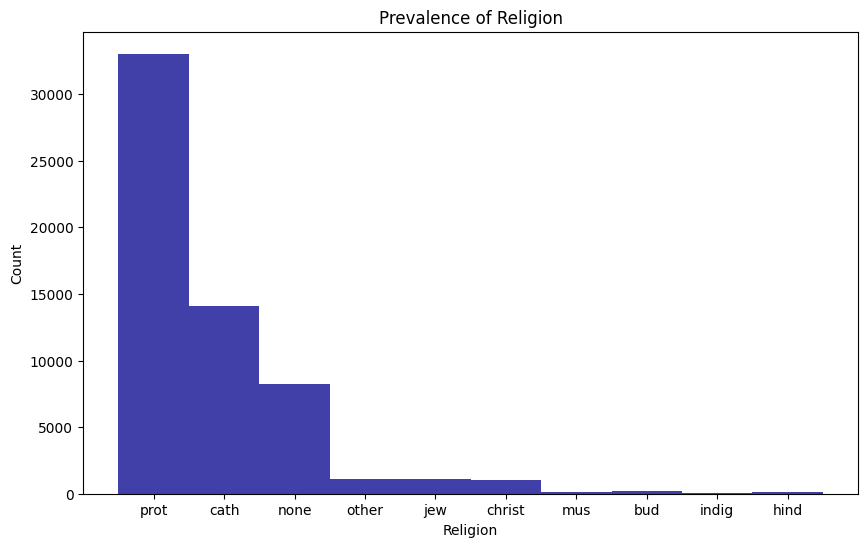

In [9]:
# making visualization and further cleaning:
import seaborn as sns
import matplotlib.pyplot as plt

# renaming the religions so they fit in axis
df['relig'] = df['relig'].replace('protestant', 'prot')
df['relig'] = df['relig'].replace('catholic', 'cath')
df['relig'] = df['relig'].replace('jewish', 'jew')
df['relig'] = df['relig'].replace('muslim', 'mus')
df['relig'] = df['relig'].replace('native american', 'indig')
df['relig'] = df['relig'].replace('other eastern religions', 'other')
df['relig'] = df['relig'].replace('christian', 'christ')
df['relig'] = df['relig'].replace('inter-nondenominational', 'christ')
df['relig'] = df['relig'].replace('hinduism', 'hind')
df['relig'] = df['relig'].replace('orthodox-christian', 'christ')
df['relig'] = df['relig'].replace('buddhism', 'bud')
df['relig'] = df['relig'].replace('muslim/islam', 'mus')
df = df[df['relig'] != 'relig'] # removes observations where 'relig' was listed as the person's religion




plt.figure(figsize=(10, 6))
sns.histplot(df['relig'], color='darkblue', edgecolor='None')
plt.title('Prevalence of Religion')
plt.xlabel('Religion')

Text(0.5, 0, 'Religious Attendance Frequency (1-8)')

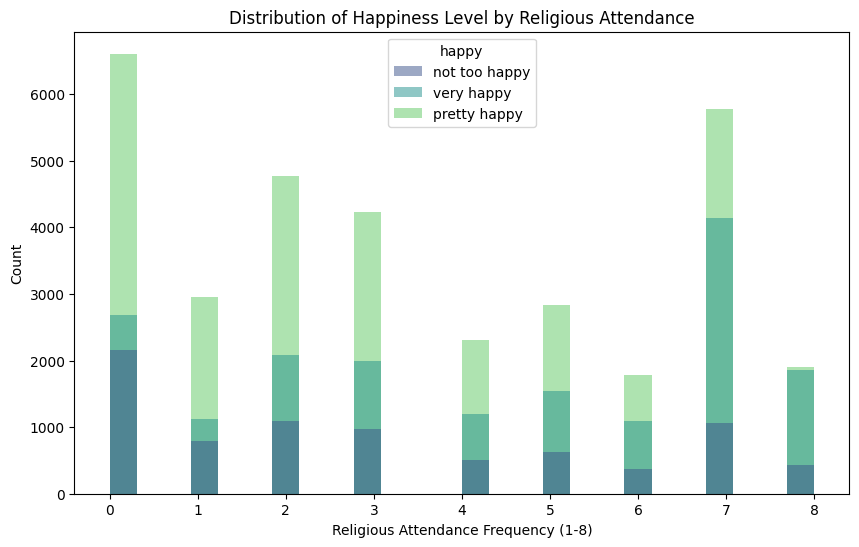

In [10]:
# how happy one is that attends religious services regularly
# create new variable "attend_num" - numerical scale for attendenace: 0 for never attend and 8 for attend the most (several times a week)
df['attend_num'] = df['attend']
df['attend_num'] = df['attend_num'].replace('never', 0)
df['attend_num'] = df['attend_num'].replace('less than once a year', 1)
df['attend_num'] = df['attend_num'].replace('about once or twice a year', 2)
df['attend_num'] = df['attend_num'].replace('several times a year', 3)
df['attend_num'] = df['attend_num'].replace('about once a month', 4)
df['attend_num'] = df['attend_num'].replace('2-3 times a month', 5)
df['attend_num'] = df['attend_num'].replace('nearly every week', 6)
df['attend_num'] = df['attend_num'].replace('every week', 7)
df['attend_num'] = df['attend_num'].replace('several times a week', 8)
df = df[df['attend_num'] != 'attend']


# bar graph for attend_num based on happiness level
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='attend_num', hue='happy', palette="viridis", edgecolor='None')
plt.title('Distribution of Happiness Level by Religious Attendance')
plt.xlabel('Religious Attendance Frequency (1-8)')


In [11]:
#add a column from relig that describes if the person is religious or not
df['relig_yn'] = df['relig'].apply(lambda x: 'no' if x == 'none' else 'yes')

In [12]:
# clean relig_fam
df['relig_fam'] = df['relig_fam'].replace('protestant', 'prot')
df['relig_fam'] = df['relig_fam'].replace('catholic', 'cath')
df['relig_fam'] = df['relig_fam'].replace('jewish', 'jew')
df['relig_fam'] = df['relig_fam'].replace('muslim', 'mus')
df['relig_fam'] = df['relig_fam'].replace('native american', 'indig')
df['relig_fam'] = df['relig_fam'].replace('other eastern religions', 'other')
df['relig_fam'] = df['relig_fam'].replace('christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('inter-nondenominational', 'christ')
df['relig_fam'] = df['relig_fam'].replace('hinduism', 'hind')
df['relig_fam'] = df['relig_fam'].replace('orthodox-christian', 'christ')
df['relig_fam'] = df['relig_fam'].replace('buddhism', 'bud')
df['relig_fam'] = df['relig_fam'].replace('muslim/islam', 'mus')
df = df[df['relig_fam'] != 'relig'] # removes observations where 'relig' wa

df.head()

,happy,hapunhap,relig,attend,relig_fam,age,income,attend_num,relig_yn
1613,not too happy,NaN,prot,several times a week,prot,54.0,"$10,000 to $14,999",8.0,yes
1614,very happy,NaN,prot,several times a year,prot,51.0,"$7,000 to $7,999",3.0,yes
1615,pretty happy,NaN,prot,never,prot,36.0,"$10,000 to $14,999",0.0,yes
1616,pretty happy,NaN,prot,never,none,32.0,"$10,000 to $14,999",0.0,yes
1617,pretty happy,NaN,prot,every week,prot,54.0,"$10,000 to $14,999",7.0,yes


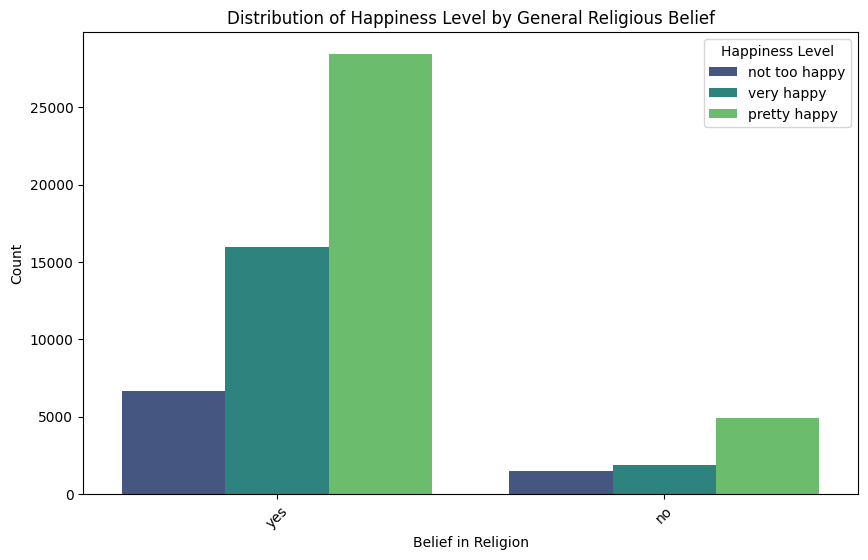

In [13]:
#count plot of happiness level by religious yes or no
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relig_yn', hue='happy', palette='viridis')
plt.title('Distribution of Happiness Level by General Religious Belief')
plt.xlabel('Belief in Religion')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Happiness Level')
plt.show()

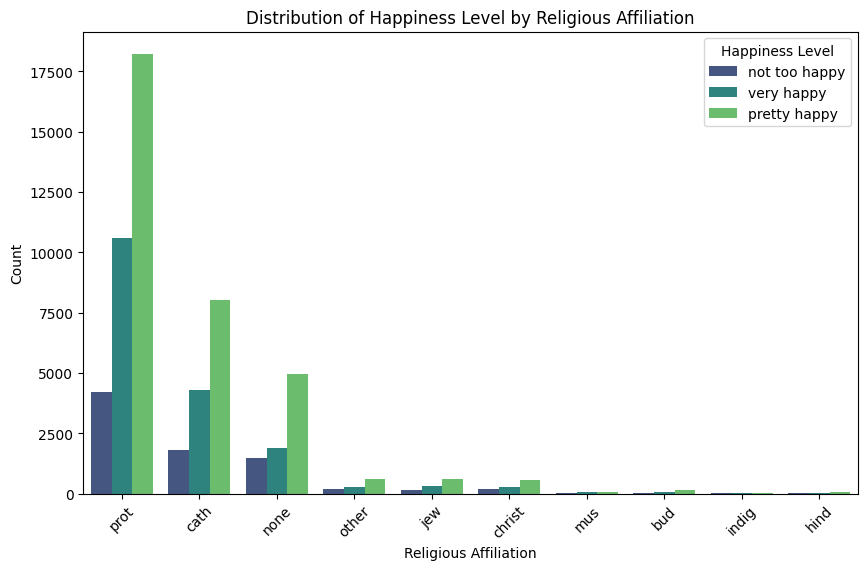

In [14]:
#count plot of happiness level by religious affiliation
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='relig', hue='happy', palette='viridis')
plt.title('Distribution of Happiness Level by Religious Affiliation')
plt.xlabel('Religious Affiliation')
plt.ylabel('Count')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.legend(title='Happiness Level')
plt.show()

<ipython-input-15-6b4ad8ef3041>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=attend_counts['attend'], y=attend_counts['index'], palette='viridis')


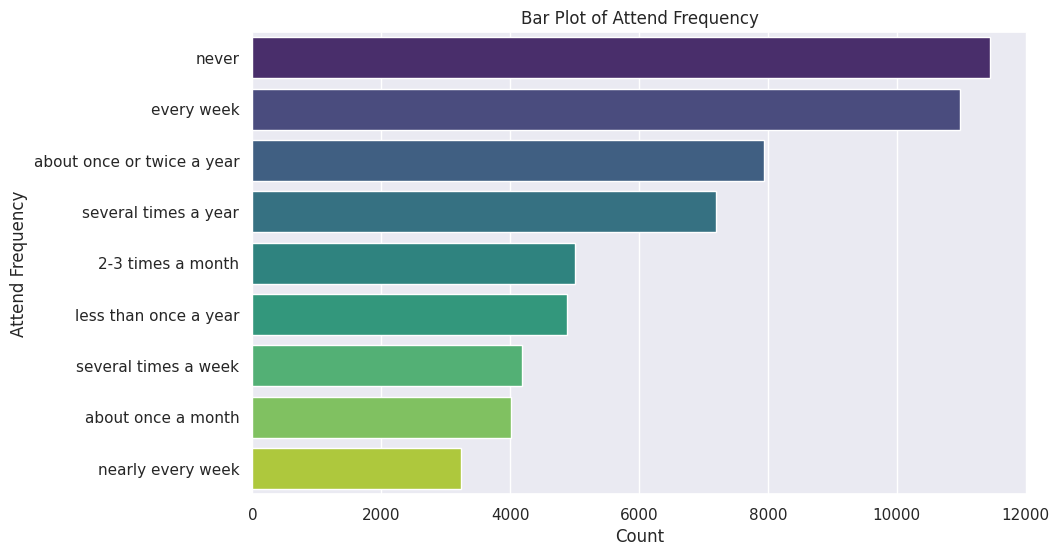

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
attend_counts = df['attend'].value_counts()

#plotting by attend
attend_counts = df['attend'].value_counts().reset_index()
plt.figure(figsize=(10, 6))
sns.set_theme()
sns.color_palette("viridis", as_cmap=True)
sns.barplot(x=attend_counts['attend'], y=attend_counts['index'], palette='viridis')
plt.title('Bar Plot of Attend Frequency')
plt.xlabel('Count')
plt.ylabel('Attend Frequency')
plt.show()

In [16]:
df.head()

,happy,hapunhap,relig,attend,relig_fam,age,income,attend_num,relig_yn
1613,not too happy,NaN,prot,several times a week,prot,54.0,"$10,000 to $14,999",8.0,yes
1614,very happy,NaN,prot,several times a year,prot,51.0,"$7,000 to $7,999",3.0,yes
1615,pretty happy,NaN,prot,never,prot,36.0,"$10,000 to $14,999",0.0,yes
1616,pretty happy,NaN,prot,never,none,32.0,"$10,000 to $14,999",0.0,yes
1617,pretty happy,NaN,prot,every week,prot,54.0,"$10,000 to $14,999",7.0,yes


In [17]:
df['age'].dtype

dtype('O')

In [18]:
df['age'] = pd.to_numeric(df['age'], errors='coerce')


In [19]:
df.head()

,happy,hapunhap,relig,attend,relig_fam,age,income,attend_num,relig_yn
1613,not too happy,NaN,prot,several times a week,prot,54.0,"$10,000 to $14,999",8.0,yes
1614,very happy,NaN,prot,several times a year,prot,51.0,"$7,000 to $7,999",3.0,yes
1615,pretty happy,NaN,prot,never,prot,36.0,"$10,000 to $14,999",0.0,yes
1616,pretty happy,NaN,prot,never,none,32.0,"$10,000 to $14,999",0.0,yes
1617,pretty happy,NaN,prot,every week,prot,54.0,"$10,000 to $14,999",7.0,yes


Text(66.25, 0.5, 'relig_yn')

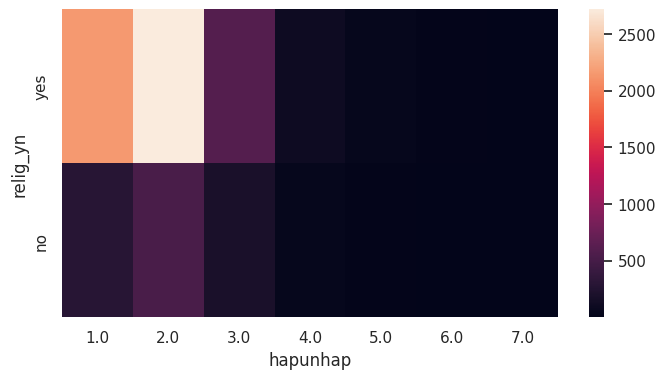

In [20]:
#hapunhap vs  heatmap
plt.subplots(figsize=(8, 4))
df_heat = pd.DataFrame({
    x_label: grp['relig_yn'].value_counts()
    for x_label, grp in df.groupby('hapunhap')
})
sns.heatmap(df_heat)
plt.xlabel('hapunhap')
plt.ylabel('relig_yn')

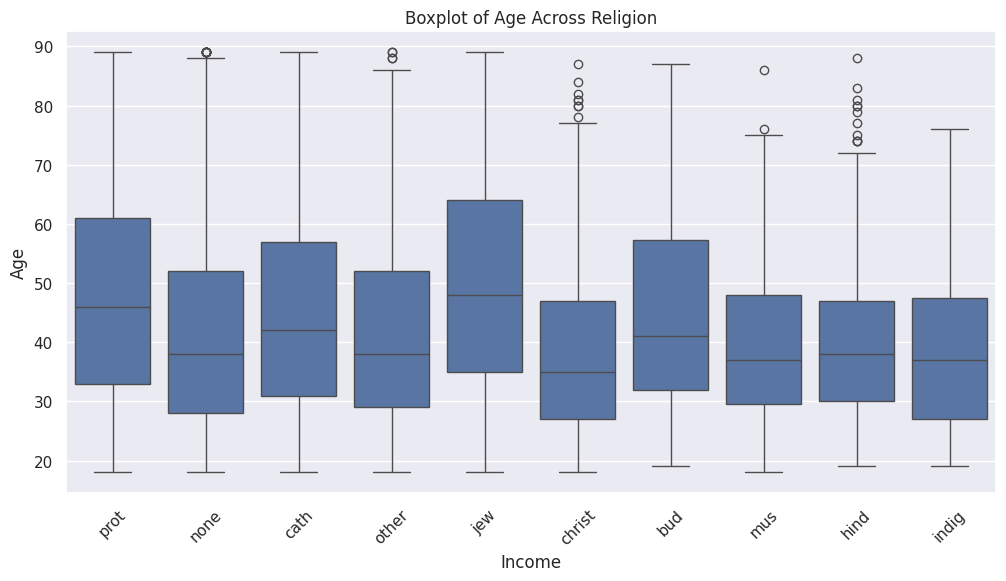

In [21]:
plt.figure(figsize=(12,6))
sns.boxplot (x='relig_fam',y = 'age', data=df)

plt.title('Boxplot of Age Across Religion')
plt.xlabel('Income')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.show()


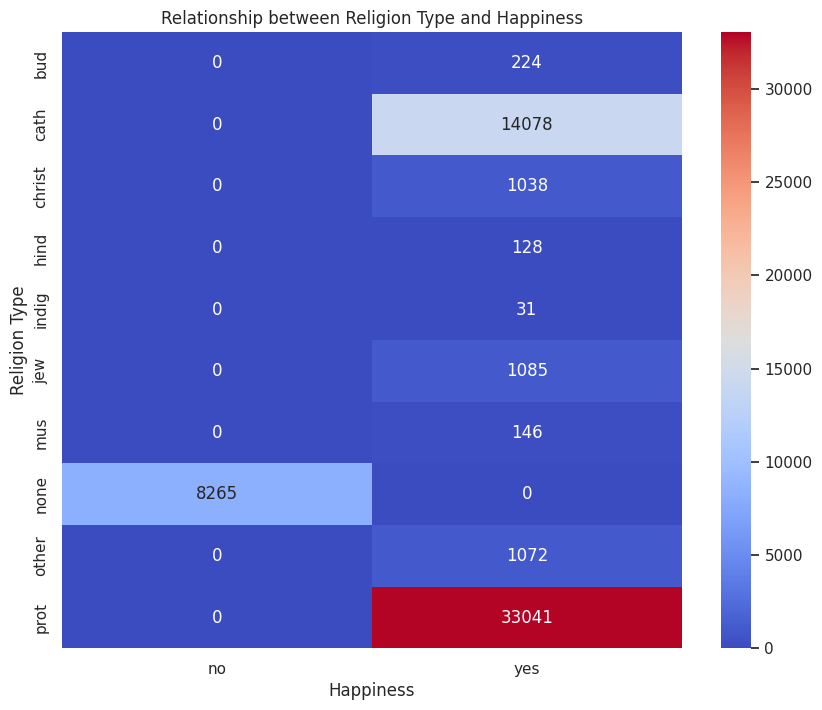

In [22]:
heatmap_data = df.pivot_table(index='relig', columns='relig_yn', aggfunc= 'size', fill_value=0)
plt.figure(figsize=(10, 8))
sns.heatmap(heatmap_data, annot=True, fmt='d', cmap='coolwarm', cbar=True)
plt.title('Relationship between Religion Type and Happiness')
plt.xlabel('Happiness')
plt.ylabel('Religion Type')
plt.show()

Text(0, 0.5, 'Happiness Level')

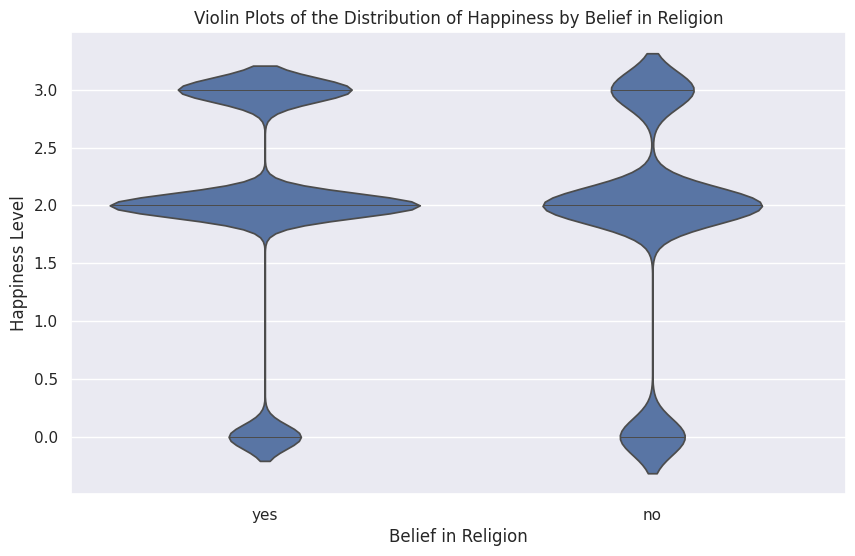

In [23]:
# violin plot 1: belief in religion and happiness

# recoding the happy variable to be numeric
df["happy_num"] = df["happy"]
df["happy_num"] = df['happy_num'].replace('not too happy', 0)
df["happy_num"] = df['happy_num'].replace('happy', 1)
df["happy_num"] = df['happy_num'].replace('pretty happy', 2)
df["happy_num"] = df['happy_num'].replace('very happy', 3)

import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, x="relig_yn", y="happy_num", inner = "stick")
plt.title('Violin Plots of the Distribution of Happiness by Belief in Religion')
plt.xlabel('Belief in Religion')
plt.ylabel('Happiness Level')

# regardless of belief in religion, it appears that most people are pretty
# happy (we see the distribution is concentrated at the value 2 -- which
# indicates that most of values have the value "2" in the dataset)

Text(0.5, 0, 'Happiness Level')

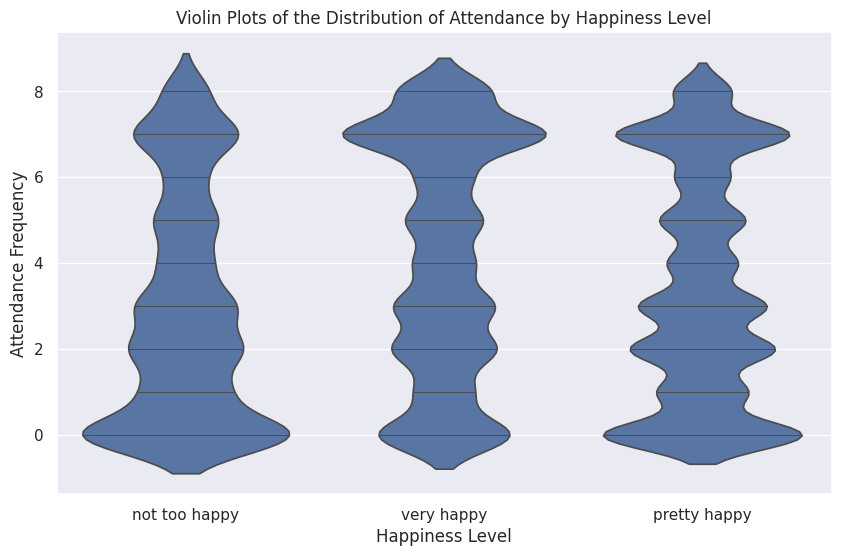

In [24]:
# boxplot 2: religious attendance and happiness
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 6))
sns.violinplot(data=df, y="attend_num", x="happy", inner = "stick")
plt.title('Violin Plots of the Distribution of Attendance by Happiness Level')
plt.ylabel('Attendance Frequency')
plt.xlabel('Happiness Level')


Text(0.5, 0, 'Happiness Level')

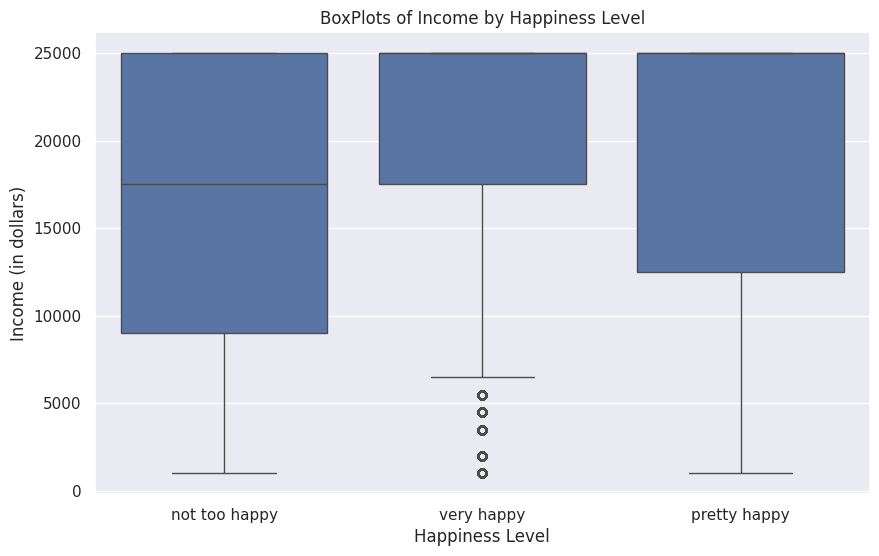

In [25]:
import numpy as np

df["income_num"] = df["income"]
df["income_num"] = df['income_num'].replace('under $1,000', 1000)
df["income_num"] = df['income_num'].replace('income', np.nan)
df["income_num"] = df['income_num'].replace('$4,000 to $4,999', 4500)
df["income_num"] = df['income_num'].replace('$6,000 to $6,999', 6500)
df["income_num"] = df['income_num'].replace('$7,000 to $7,999', 7500)
df["income_num"] = df['income_num'].replace('$3,000 to $3,999', 3500)
df["income_num"] = df['income_num'].replace('$5,000 to $5,999', 5500)
df["income_num"] = df['income_num'].replace('$1,000 to $2,999', 2000)
df["income_num"] = df['income_num'].replace('$8,000 to $9,999', 9000)
df["income_num"] = df['income_num'].replace('$10,000 to $14,999', 12500)
df["income_num"] = df['income_num'].replace('$15,000 to $19,999', 17500)
df["income_num"] = df['income_num'].replace('$20,000 to $24,999', 22500)
df["income_num"] = df['income_num'].replace('$25,000 or more', 25000)

#df["income_num"].value_counts()
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="income_num", x="happy")
plt.title('BoxPlots of Income by Happiness Level')
plt.ylabel('Income (in dollars)')
plt.xlabel('Happiness Level')

In [26]:
# statistics for happiness level by income
df.loc[:,['income_num', "happy_num"]].groupby(['income_num']).describe()

happy_num                                             
               count      mean       std  min  25%  50%  75%  max
income_num                                                       
1000           830.0  1.603614  1.145921  0.0  0.0  2.0  2.0  3.0
2000          1359.0  1.705666  1.073261  0.0  0.0  2.0  2.0  3.0
3500          1267.0  1.737964  1.057959  0.0  2.0  2.0  2.0  3.0
4500          1149.0  1.816362  1.033520  0.0  2.0  2.0  2.0  3.0
5500          1270.0  1.870866  1.001505  0.0  2.0  2.0  3.0  3.0
6500          1178.0  1.822581  1.002088  0.0  2.0  2.0  2.0  3.0
7500          1263.0  1.871734  1.021644  0.0  2.0  2.0  3.0  3.0
9000          2192.0  1.840785  1.010089  0.0  2.0  2.0  2.0  3.0
12500         6565.0  1.938005  0.963199  0.0  2.0  2.0  3.0  3.0
17500         5030.0  1.993241  0.922506  0.0  2.0  2.0  3.0  3.0
22500         5226.0  2.010333  0.926117  0.0  2.0  2.0  3.0  3.0
25000        31963.0  2.130182  0.847840  0.0  2.0  2.0  3.0  3.0

Text(0.5, 0, 'Happiness Level')

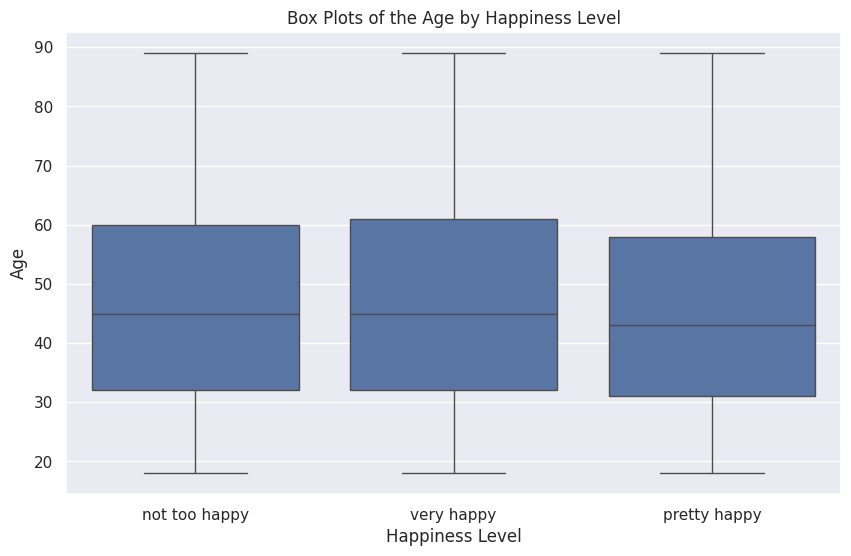

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, y="age", x="happy")
plt.title('Box Plots of the Age by Happiness Level')
plt.ylabel('Age')
plt.xlabel('Happiness Level')

Text(0.5, 0, 'Happiness Level')

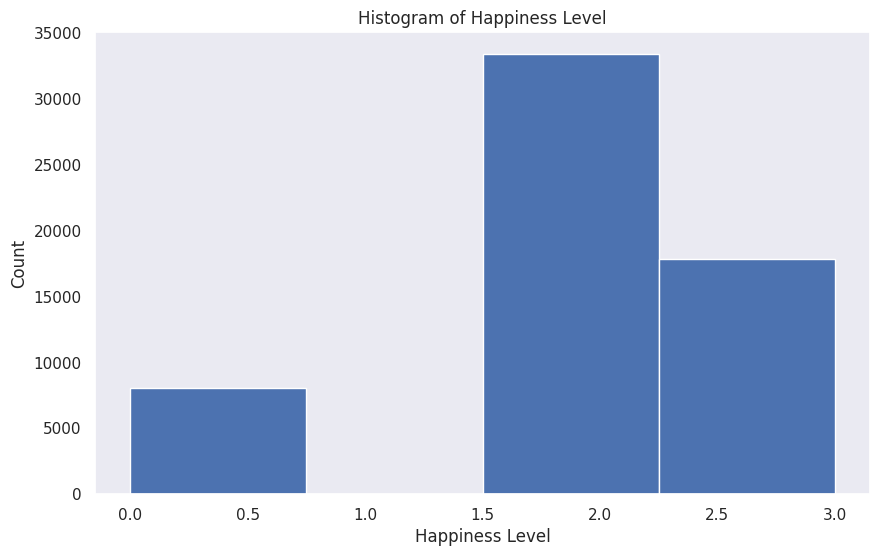

In [28]:
# histograms of response variable (happiness levels)
plt.figure(figsize=(10, 6))
df['happy_num'].hist(bins=4,grid=False)
plt.title('Histogram of Happiness Level')
plt.ylabel('Count')
plt.xlabel('Happiness Level')

In [29]:
# statistics for happiness level by income
df.loc[:,['age', "happy_num"]].groupby(['happy_num']).describe()

age                                                    
             count       mean        std   min   25%   50%   75%   max
happy_num                                                             
0           8017.0  46.942622  17.501210  18.0  32.0  45.0  60.0  89.0
2          33174.0  45.396545  17.170852  18.0  31.0  43.0  58.0  89.0
3          17725.0  47.026629  17.358704  18.0  32.0  45.0  61.0  89.0

Text(0, 0.5, 'Income')

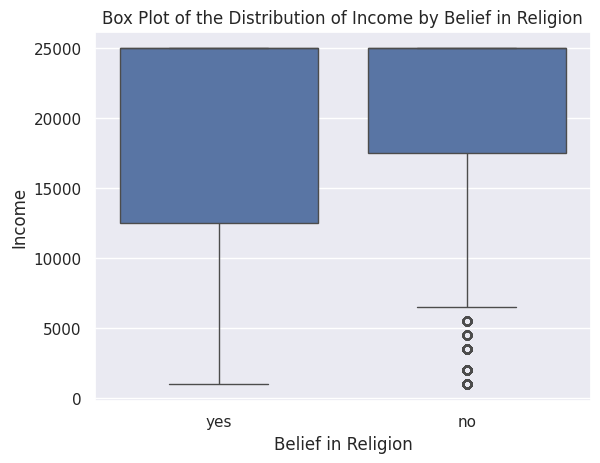

In [40]:
sns.boxplot(data=df, y="income_num", x="relig_yn")
plt.title('Box Plot of the Distribution of Income by Belief in Religion')
plt.xlabel('Belief in Religion')
plt.ylabel('Income')
